In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('icons.csv').set_index('notif_id')

In [5]:
#default tsne
tsne = TSNE()

In [6]:
result = tsne.fit_transform(data)

In [13]:
result_x = result[:,0]
result_y = result[:,1]

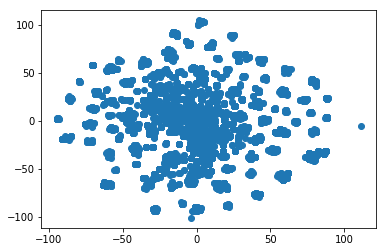

In [17]:
plt.scatter(result_x,result_y)

In [31]:
#2 component tsne for checking
tsne_2 = TSNE(n_components=2)

In [4]:
x_data = np.array(data[[f'F{i}' for i in range(1,201)]])

In [32]:
result_2 = tsne_2.fit_transform(x_data)

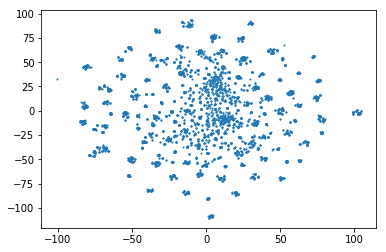

In [50]:
plt.scatter(result_2[:,0],result_2[:,1],s=1)

In [35]:
result.shape

(6279, 2)

In [40]:
#tsne without duplicates
droped_data = data.drop_duplicates()

In [44]:
droped_tsne = TSNE(n_components=2)

In [45]:
droped_y = droped_tsne.fit_transform(droped_data)

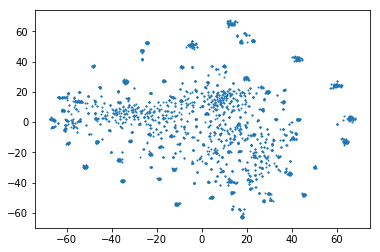

In [49]:
plt.scatter(droped_y[:,0],droped_y[:,1],s=1)

In [10]:
from sklearn.cluster import DBSCAN

In [52]:
clustered = DBSCAN(min_samples=2,eps=1).fit(droped_y)

In [57]:
clustered.labels_

array([  0,   1,   2, ..., 183,  74, 154], dtype=int64)

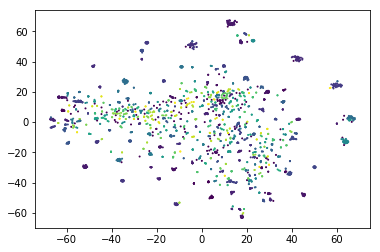

In [63]:
#clustered tsne without duplicates
plt.scatter(droped_y[:,0],droped_y[:,1],c=clustered.labels_,s=1)

In [66]:
len(np.unique(clustered.labels_))

410

In [31]:
tsne3 = TSNE(n_components=3)

In [8]:
result_3 = tsne3.fit_transform(x_data)

In [19]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=20).fit(x_data)

In [29]:
km.labels_

array([14,  4, 19, ..., 15, 11,  8])

In [30]:
tsne1 = TSNE(n_components=1)

In [32]:
result_1 = tsne1.fit_transform(x_data)

<BarContainer object of 6279 artists>

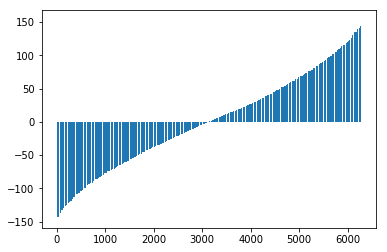

In [46]:
plt.bar(range(6279),np.sort(np.squeeze(result_1)))